In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, date

In [2]:
# We have 60 CSV files
#    30 tickers, 1 file containing 2012 to 2018, 1 file containing 2018 to 2020
raw_data_dir = 'main/data_raw'
# raw_train_data = [pd.read_csv(f'{raw_data_dir}/{i}') for i in os.listdir(raw_data_dir) if '2012' in i]
# raw_test_data = [pd.read_csv(f'{raw_data_dir}/{i}') for i in os.listdir(raw_data_dir) if '2020' in i]

# intermediate_train_data = []
# intermediate_test_data = []

train_fnames = [f'{raw_data_dir}/{i}' for i in os.listdir(raw_data_dir) if '2012' in i]
test_fnames = [f'{raw_data_dir}/{i}' for i in os.listdir(raw_data_dir) if '2020' in i]
train_data = pd.read_csv(train_fnames[0])
test_data = pd.read_csv(test_fnames[0])

train_data

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-03,31.799999,32.000000,31.559999,30.204050,11726370.0
1,2012-01-04,32.000000,32.000000,31.600000,30.166059,9270400.0
2,2012-01-05,31.799999,31.959999,31.360001,29.900114,15810575.0
3,2012-01-06,30.920000,31.500000,30.780001,29.349222,15174110.0
4,2012-01-09,30.920000,31.180000,30.059999,29.482199,14090720.0
...,...,...,...,...,...,...
1473,2017-12-22,403.799988,405.799988,400.799988,402.698151,16146080.0
1474,2017-12-27,407.799988,407.799988,401.000000,398.133331,16680601.0
1475,2017-12-28,404.000000,408.200012,402.200012,405.079834,11662053.0
1476,2017-12-29,408.000000,408.000000,403.399994,402.896637,16601658.0


In [9]:
def do_transform(train_data):
    history = 180
    bins = [180, 90, 30, 7, 3]
    res = []
    for i in range(180, train_data.shape[0]-1):
        train_temp = train_data[['Close', 'Volume']][i-history:i]
        close = train_temp[['Close']]/train_temp[['Close']].values[-1]
        vol = train_temp[['Volume']]/train_temp[['Volume']].values[-1]
        diff_close = [close.values[-j][0]-close.values[-1][0] for j in bins]
        stdev_close = [close[-j:].std().values[0] for j in bins]
        avg_vol = [vol[-j:].mean().values[0] for j in bins]
        close_change_tomorrow = [train_data[['Close']].values[i+1][0]/train_temp[['Close']].values[-1][0] - train_data[['Close']].values[i][0]/train_temp[['Close']].values[-1][0]]

        total_row = diff_close + stdev_close + avg_vol + close_change_tomorrow
        res.append(total_row)
    return pd.DataFrame(res, columns=['diff_close_180', 'diff_close_90', 'diff_close_30', 'diff_close_7', 'diff_close_3', 'std_close_180', 'std_close_90', 'std_close_30', 'std_close_7', 'std_close_3', 'avg_vol_180', 'avg_vol_90', 'avg_vol_30', 'avg_vol_7', 'avg_vol_3', 'target'])


def transform_file(fname: str):
    # Read given file
    # Do transformations
    # Add in timestamp and stock columns
    stock = fname.split('/')[2].split('_')[0]
    train_data = pd.read_csv(fname)
    transformed_data = do_transform(train_data)
    timestamps = np.array(train_data[['timestamp']][180:train_data.shape[0]-1])
    transformed_data.insert(0, 'timestamp', timestamps)
    transformed_data.insert(0, 'stock', stock)
    return transformed_data

def clean_files(fnames: list):
    # Iterate through given file names
    # Get cleaned dataframe for each file
    # Return concatenated dataframes
    df_list = []
    for fname in fnames:
        df_list.append(transform_data(fname))
    df_all = pd.concat(df_list).reset_index(drop=True)
    return df_all

print(clean_files(train_fnames[:2]))

        Stock   Timestamp  diff_close_180  diff_close_90  diff_close_30  \
0     0700.HK  2012-09-24       -0.384449      -0.118110      -0.100787   
1     0700.HK  2012-09-25       -0.388114      -0.152038      -0.097179   
2     0700.HK  2012-09-26       -0.395876      -0.177986      -0.102264   
3     0700.HK  2012-09-27       -0.406543      -0.179688      -0.044531   
4     0700.HK  2012-09-28       -0.417951      -0.182304      -0.053394   
...       ...         ...             ...            ...            ...   
2589  0939.HK  2017-12-21       -0.142075      -0.068571      -0.017143   
2590  0939.HK  2017-12-22       -0.142901      -0.053977      -0.029829   
2591  0939.HK  2017-12-27       -0.158943      -0.060993      -0.036879   
2592  0939.HK  2017-12-28       -0.167377      -0.084388      -0.050633   
2593  0939.HK  2017-12-29       -0.169043      -0.089261      -0.068340   

      diff_close_7  diff_close_3  std_close_180  std_close_90  std_close_30  \
0        -0.020473  

2.3545452888799696


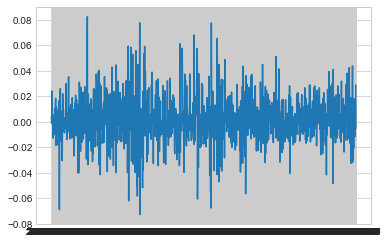

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
ax.plot(train_all['Timestamp'].values.tolist(), train_all['target'].values.tolist());
print(train_all['target'].sum())